In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls

gdrive	sample_data


In [11]:
%cd "gdrive/My Drive/"

/content/gdrive/My Drive


In [12]:
!ls

'Colab Notebooks'


In [14]:
!git clone https://github.com/iro-cp/FCRN-DepthPrediction.git

Cloning into 'FCRN-DepthPrediction'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (59/59), done.


In [15]:
%cd FCRN-DepthPrediction/

/content/gdrive/MyDrive/FCRN-DepthPrediction


In [18]:
!rm -rf .git

In [21]:
!rm -rf LICENSE

In [23]:
!rm -rf README.md

In [24]:
!wget http://campar.in.tum.de/files/rupprecht/depthpred/NYU_ResNet-UpProj.npy

--2021-11-05 15:07:07--  http://campar.in.tum.de/files/rupprecht/depthpred/NYU_ResNet-UpProj.npy
Resolving campar.in.tum.de (campar.in.tum.de)... 131.159.10.57
Connecting to campar.in.tum.de (campar.in.tum.de)|131.159.10.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254553442 (243M) [text/plain]
Saving to: ‘NYU_ResNet-UpProj.npy’

NYU_ResNet-UpProj.n 100%[===================>] 242.76M  27.3MB/s    in 11s     

2021-11-05 15:07:18 (22.3 MB/s) - ‘NYU_ResNet-UpProj.npy’ saved [254553442/254553442]



In [25]:
%cd tensorflow

/content/gdrive/My Drive/FCRN-DepthPrediction/tensorflow


In [34]:
!python predict.py ../NYU_ResNet-UpProj.npy ../00410_colors.png


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2021-11-05 15:20:33.142227: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-05 15:20:33.142287: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4c020ef821b7): /proc/driver/nvidia/version does not exist
Loading the model
2021-11-05 15:20:33.793742: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open ../NYU_ResNet-UpProj.npy: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
2021-11-05 15:20:33.794778: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open ../NYU_ResNet-UpProj.npy: Data loss: not an sstable (bad magi

In [35]:
!wget http://campar.in.tum.de/files/rupprecht/depthpred/NYU_FCRN-checkpoint.zip

--2021-11-05 15:23:58--  http://campar.in.tum.de/files/rupprecht/depthpred/NYU_FCRN-checkpoint.zip
Resolving campar.in.tum.de (campar.in.tum.de)... 131.159.10.57
Connecting to campar.in.tum.de (campar.in.tum.de)|131.159.10.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472588519 (451M) [application/zip]
Saving to: ‘NYU_FCRN-checkpoint.zip’

NYU_FCRN-checkpoint 100%[===================>] 450.70M  24.1MB/s    in 19s     

2021-11-05 15:24:17 (24.2 MB/s) - ‘NYU_FCRN-checkpoint.zip’ saved [472588519/472588519]



In [36]:
!unzip "NYU_FCRN-checkpoint.zip" -d "./NYU_FCRN"

Archive:  NYU_FCRN-checkpoint.zip
  inflating: ./NYU_FCRN/NYU_FCRN.ckpt.data-00000-of-00001  
  inflating: ./NYU_FCRN/NYU_FCRN.ckpt.index  
  inflating: ./NYU_FCRN/NYU_FCRN.ckpt.meta  


In [48]:
%matplotlib inline

In [52]:
!python predict.py ./NYU_FCRN/NYU_FCRN.ckpt ../00410_colors.png

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2021-11-05 15:45:36.628317: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-05 15:45:36.628371: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4c020ef821b7): /proc/driver/nvidia/version does not exist
Loading the model
<Figure size 640x480 with 2 Axes>


In [53]:
import argparse
import os
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from PIL import Image
import models

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loading the model
INFO:tensorflow:Restoring parameters from ./NYU_FCRN/NYU_FCRN.ckpt


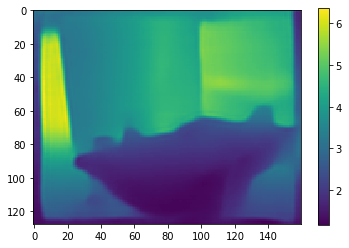

In [54]:
height = 228
width = 304
channels = 3
batch_size = 1

# Read image
img = Image.open('../00410_colors.png')
img = img.resize([width,height], Image.ANTIALIAS)
img = np.array(img).astype('float32')
img = np.expand_dims(np.asarray(img), axis = 0)

# Create a placeholder for the input image
input_node = tf.placeholder(tf.float32, shape=(None, height, width, channels))

# Construct the network
net = models.ResNet50UpProj({'data': input_node}, batch_size, 1, False)
    
with tf.Session() as sess:

    # Load the converted parameters
    print('Loading the model')

    # Use to load from ckpt file
    saver = tf.train.Saver()     
    saver.restore(sess, './NYU_FCRN/NYU_FCRN.ckpt')

    # Use to load from npy file
    #net.load(model_data_path, sess) 

    # Evalute the network for the given image
    pred = sess.run(net.get_output(), feed_dict={input_node: img})
    
    # Plot result
    fig = plt.figure()
    ii = plt.imshow(pred[0,:,:,0], interpolation='nearest')
    fig.colorbar(ii)
    plt.show()